Here we do the following:
+ Fetch data on total imports and exports between China and the rest of the world for each year 2000-2022
+ Compute the sum of exports and imports for each year
+ Import data on China's GDP from the World Bank (I simply imported a CSV file of GDP values)
+ Compute the statistic (X+M)/Y for each year

(Note: It is most appropriate to use GDP in current dollars for this exercise.  This is because UN Comtrade data is calculated in current US dollar values using average annual exchange rates.  To ensure our trade data and GDP data do not mix up nominal versus real values, we want both to be expressed in current US dollars.)

Step 1: Import the necessary libraries into our Python environment.  The library `comtradeapicall` allows us to communicate with the UN Comtrade API so that we can directly access this database .  You specify the type of data you want using `Selection Criteria` which are the list of specifications immediately following the use of `comtradeapicall` command in the codes below.  You can find detailed descriptions of `Section Criteria` in the documentation here: https://pypi.org/project/comtradeapicall/.  We also use `pandas` library which is great for data analysis: https://pandas.pydata.org/.  We'll use it to organize the data we get from UN Comtrade into a neat table called a `DataFrame`, which is similar to a spreadsheet.  We also use the library `matplotlib` which is useful for making plots to visualize the data, and `seaborn` which is built on top of `matplotlib` and provides more visually appealing plots.

In [1]:
# Step 1: Import the necessary libraries into our Python environment.

import comtradeapicall
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Building a function to fetch trade data.  We want to fetch trade data for various countries over various years.  Instead of writing new code of every different data query, we create a function: a block of code that performs a specific task and can be called whenever needed.  We will call our function `fetch_trade_data`, and it takes three pieces of information: `reporter_code` (what country do we want data?); `year` (what year do we want data?); and `flow_code` (do we want imports `M` or exports `X`?).  Within the same function we convert the raw data into a `DataFrame`.  This is where our `pandas` library is useful.  We want to convert the raw data from UN Comtrade into an easy to read/manipulate spreadsheet-like table.  Once we have the data in a `DataFrame`, we can then easily view and manipulate the data.  

In this example, we fetch total import and export values for China from 2000-2023.  We therefore set `reporter_code` to value `156`; `flow_code` to values `X` and `M`; and then loop over `year` from values 2000 to 2022.  You can replace these three arguments in the `fetch_trade_data` function to collect whatever data you're interested in. 

In [2]:
# Step 2: This function fetches trade data (imports or exports) for a specific country, for a specific year from the UN Comtrade database and converts it into a DataFrame.

def fetch_trade_data(reporter_code, year, flow_code):
        mydf = comtradeapicall.previewFinalData(
        typeCode='C',       # 'C' for Commodities
        freqCode='A',       # 'A' for Annual data
        clCode='HS',        # 'HS' for Harmonized System (goods classification)
        period=year,        # The year we're looking for
        reporterCode=reporter_code,  # The code for our selected country
        cmdCode='TOTAL',    # All commodities
        flowCode=flow_code, # 'M' for imports or 'X' for exports
        partnerCode=None,   # All trading partners
        partner2Code=None,
        customsCode=None,
        motCode=None,
        maxRecords=5000,    # Max number of records to get
        format_output='JSON', # Get data in a web-friendly JSON format
        aggregateBy=None,
        breakdownMode='classic',
        countOnly=None,
        includeDesc=True    # Include descriptions (like country names)
    )

        df = pd.DataFrame(mydf)


    # Filter out 'World' and 'China' from the data
        reporter_country_name = df['reporterDesc'].iloc[0]
        df_clean = df[~df['partnerDesc'].isin(['World', reporter_country_name])]

    # Since we are fetching data for Sum the 'primaryValue' column to get the total trade value.
        return df_clean

# Create an empty list to store all the detailed trade information we're about to collect
all_trade_data = []

# Collect data by iterating through years 2000 to 2022
selected_reporter_code = '156' # China
for year in range(2000, 2023):
    year_str = str(year)
    print(f"Fetching total trade data for {selected_reporter_code} in year: {year_str}")

    # Fetch partner-level data for imports for the current year
    imports_partner = fetch_trade_data(selected_reporter_code, year_str, 'M')
    imports_partner['Year'] = year # Add a 'Year' column
    imports_partner['Flow'] = 'Imports' # Add a 'Flow' column
    all_trade_data.append(imports_partner) # Add to our list

    # Fetch partner-level data for exports for the current year
    exports_partner = fetch_trade_data(selected_reporter_code, year_str, 'X')
    exports_partner['Year'] = year # Add a 'Year' column
    exports_partner['Flow'] = 'Exports' # Add a 'Flow' column
    all_trade_data.append(exports_partner) # Add to our list

# Combine all the individual DataFrames into one large DataFrame
all_trade_partner = pd.concat(all_trade_data, ignore_index=True)

print(f"\nAll detailed trade data for Reporter Code {selected_reporter_code} (2000-2022) fetched and combined:")

# Optionally, save the master detailed DataFrame to a CSV file
output_path_all_detailed = rf"C:\Users\XPS\Dropbox\Website\International Trade\data\{selected_reporter_code}_all_trade_partner_2000_2022.csv"
all_trade_partner.to_csv(output_path_all_detailed, index=False)
print(f"\nAll detailed trade data saved to: {output_path_all_detailed}")




Fetching total trade data for 156 in year: 2000


Fetching total trade data for 156 in year: 2001


Fetching total trade data for 156 in year: 2002


Fetching total trade data for 156 in year: 2003


KeyboardInterrupt: 

Step 3: Visualize the data.  We now have a `DataFrame` called `all_trade_partner` which contains all import and export values for every trading partner with China from 2000-2022.  First, let's sum trade values across trading partners to measure total import and export values for China for each year from 2000 to 2022.  We make use of our `pandas` library to sum over the `primaryValue` which is the export and import values and group them by year and export/import.  Then we make use of the `matplotlib` library to plot import and export values over time.  


Yearly Total Trade (Imports + Exports) for Reporter Code 156 (2000-2022):
    Year  Total_Exports  Total_Imports   Total_Trade
0   2000   2.492026e+11   2.179206e+11  4.671232e+11
1   2001   2.660982e+11   2.347874e+11  5.008856e+11
2   2002   3.255960e+11   2.801899e+11  6.057859e+11
3   2003   4.382278e+11   3.876655e+11  8.258933e+11
4   2004   5.933256e+11   5.225742e+11  1.115900e+12
5   2005   7.619534e+11   6.047899e+11  1.366743e+12
6   2006   9.689356e+11   7.181280e+11  1.687064e+12
7   2007   1.220060e+12   8.703422e+11  2.090402e+12
8   2008   1.430693e+12   1.040101e+12  2.470794e+12
9   2009   1.201647e+12   9.191412e+11  2.120788e+12
10  2010   1.577764e+12   1.289134e+12  2.866897e+12
11  2011   1.898388e+12   1.620780e+12  3.519169e+12
12  2012   2.048782e+12   1.675269e+12  3.724052e+12
13  2013   2.209007e+12   1.792451e+12  4.001459e+12
14  2014   2.342293e+12   1.814354e+12  4.156647e+12
15  2015   2.273468e+12   1.536195e+12  3.809663e+12
16  2016   2.097637e+12 

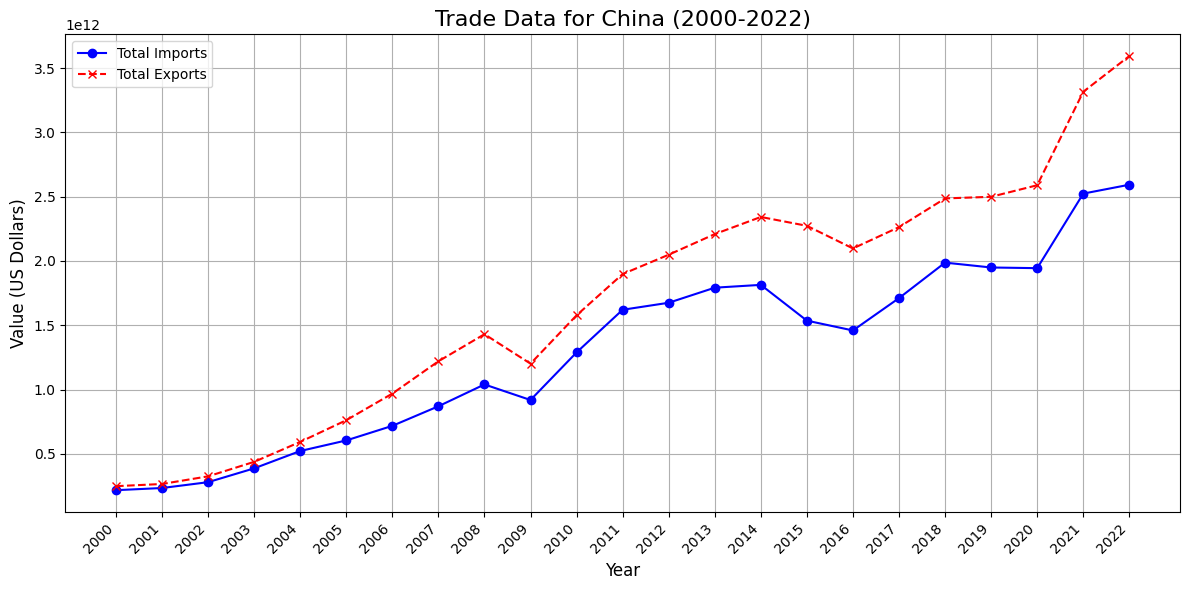

In [ ]:
# Calculate yearly total trade from df_all_trade_partner
# Now we compute the yearly totals by grouping our master DataFrame.

df_total_trade = all_trade_partner.groupby(['Year', 'Flow'])['primaryValue'].sum().unstack().reset_index()
df_total_trade.columns.name = None # Remove the 'Flow' column name from index
df_total_trade['Total_Trade'] = df_total_trade['Imports'] + df_total_trade['Exports'] # Calculate total trade

# Rename columns for clarity (matching previous output)
df_total_trade = df_total_trade.rename(columns={'Imports': 'Total_Imports', 'Exports': 'Total_Exports'})

print(f"\nYearly Total Trade (Imports + Exports) for Reporter Code {selected_reporter_code} (2000-2022):")
print(df_total_trade)

# Export total trade values to a CSV file.
output_path_total_summary = r"C:\Users\XPS\Dropbox\Website\International Trade\data\china_yearly_trade_summary.csv"
df_total_trade.to_csv(output_path_total_summary, index=False)

print(f"Total yearly trade summary data saved to: {output_path_total_summary}")

# Step 3: Plotting imports and exports over time

# Set the size of the plot for better readability
plt.figure(figsize=(12, 6))

# Plot total imports and total exports
plt.plot(df_total_trade['Year'], df_total_trade['Total_Imports'],
         marker='o',         # Add circles at each data point
         linestyle='-',      # Use a solid line
         color='blue',       # Make the line blue
         label='Total Imports') # Label this line for the legend

plt.plot(df_total_trade['Year'], df_total_trade['Total_Exports'],
         marker='x',         # Add 'x' marks at each data point
         linestyle='--',     # Use a dashed line
         color='red',        # Make the line red
         label='Total Exports') # Label this line for the legend

# Add a title and axis labels to the plot
plt.title(f'Trade Data for China (2000-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value (US Dollars)', fontsize=12)

# Improve x-axis ticks: show every year and rotate labels if needed
# Add a grid for easier reading of values
# Add a legend to identify which line is which
plt.xticks(df_total_trade['Year'], rotation=45, ha='right') # ha='right' aligns labels nicely
plt.grid(True)
plt.legend(fontsize=10)

# Adjust the plot layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

Step 4: Collect GDP data and compute the trade-to-GDP ratio over time.  In this example, I've already downloaded and cleaned GDP data for China sourced from the World Bank: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=CN.  After importing GDP data from my CSV file, we combine the GDP data and trade data into one `DataFrame` called `df_combined` and compute the ratio $(X+M)/Y$.  Lastly, we plot the trade-to-GDP ratio over time.

In [27]:
# Import Chinese GDP data
# Define the path to your clean GDP CSV file
gdp_file_path = "china_gdp_current_usd.csv"
df_gdp_clean = pd.read_csv(gdp_file_path)

# Rename the GDP column to a simpler name for easier access The exact name depends on your CSV.
df_gdp_clean.rename(columns={'GDP (current US dollars)': 'GDP_Current_USD'}, inplace=True)

# 2. Ensure 'Year' and 'GDP_Current_USD' are numeric
df_gdp_clean['Year'] = pd.to_numeric(df_gdp_clean['Year'], errors='coerce')
df_gdp_clean['GDP_Current_USD'] = pd.to_numeric(df_gdp_clean['GDP_Current_USD'], errors='coerce')

# Drop any rows where 'Year' or 'GDP_Current_USD' couldn't be converted (i.e., are NaN)
df_gdp_clean.dropna(subset=['Year', 'GDP_Current_USD'], inplace=True)

# Select only the relevant columns and sort by year
df_final_gdp = df_gdp_clean[['Year', 'GDP_Current_USD']].sort_values(by='Year').copy()

print("\n--- Cleaned and Prepared China GDP Data (2000-2022) ---")

# Step 4: Compute total trade to GDP ratio (X+M)/Y (2000-2022)

# Load Trade Data
trade_file_path = "china_yearly_trade_summary.csv"

# Ensure GDP Data is Available
# This assumes `df_final_gdp` from the previous GDP preparation block is in your session.
print("\nGDP data head (from previous block):\n", df_final_gdp.head())
print("GDP data columns:", df_final_gdp.columns.tolist())

# Merge Trade Data with GDP Data
# We merge on 'Year', assuming both DataFrames have this column.
df_combined = pd.merge(df_total_trade, df_final_gdp, on='Year', how='left')

# Compute (X+M)/Y Ratio
# Ensure that the columns are numeric, coercing errors will turn non-numeric into NaN
df_combined['Total_Trade'] = pd.to_numeric(df_combined['Total_Trade'], errors='coerce')
df_combined['GDP_Current_USD'] = pd.to_numeric(df_combined['GDP_Current_USD'], errors='coerce')

# Calculate the ratio. We add checks for NaN values and division by zero.
df_combined['(X+M)/Y_Ratio'] = df_combined.apply(
    lambda row: row['Total_Trade'] / row['GDP_Current_USD']
    if pd.notna(row['Total_Trade']) and
       pd.notna(row['GDP_Current_USD']) and
       row['GDP_Current_USD'] != 0
    else None, # Assign None if the calculation isn't possible (e.g., missing data or zero GDP)
    axis=1
)

# Display Results
print(df_combined)

# Save the Final DataFrame to CSV
final_output_path = "china_trade_gdp_ratio_2000_2022.csv"
df_combined.to_csv(final_output_path, index=False)
print(f"\nFinal combined data saved to: {final_output_path}")




--- Cleaned and Prepared China GDP Data (2000-2022) ---

GDP data head (from previous block):
    Year  GDP_Current_USD
0  1960     5.971625e+10
1  1961     5.005669e+10
2  1962     4.720919e+10
3  1963     5.070661e+10
4  1964     5.970813e+10
GDP data columns: ['Year', 'GDP_Current_USD']
    Year  Total_Exports  Total_Imports   Total_Trade  GDP_Current_USD  \
0   2000   2.492026e+11   2.179206e+11  4.671232e+11     1.211332e+12   
1   2001   2.660982e+11   2.347874e+11  5.008856e+11     1.339401e+12   
2   2002   3.255960e+11   2.801899e+11  6.057859e+11     1.470558e+12   
3   2003   4.382278e+11   3.876655e+11  8.258933e+11     1.660281e+12   
4   2004   5.933256e+11   5.225742e+11  1.115900e+12     1.955347e+12   
5   2005   7.619534e+11   6.047899e+11  1.366743e+12     2.285961e+12   
6   2006   9.689356e+11   7.181280e+11  1.687064e+12     2.752119e+12   
7   2007   1.220060e+12   8.703422e+11  2.090402e+12     3.550328e+12   
8   2008   1.430693e+12   1.040101e+12  2.470794e+1

Loaded data from CSV for plotting.


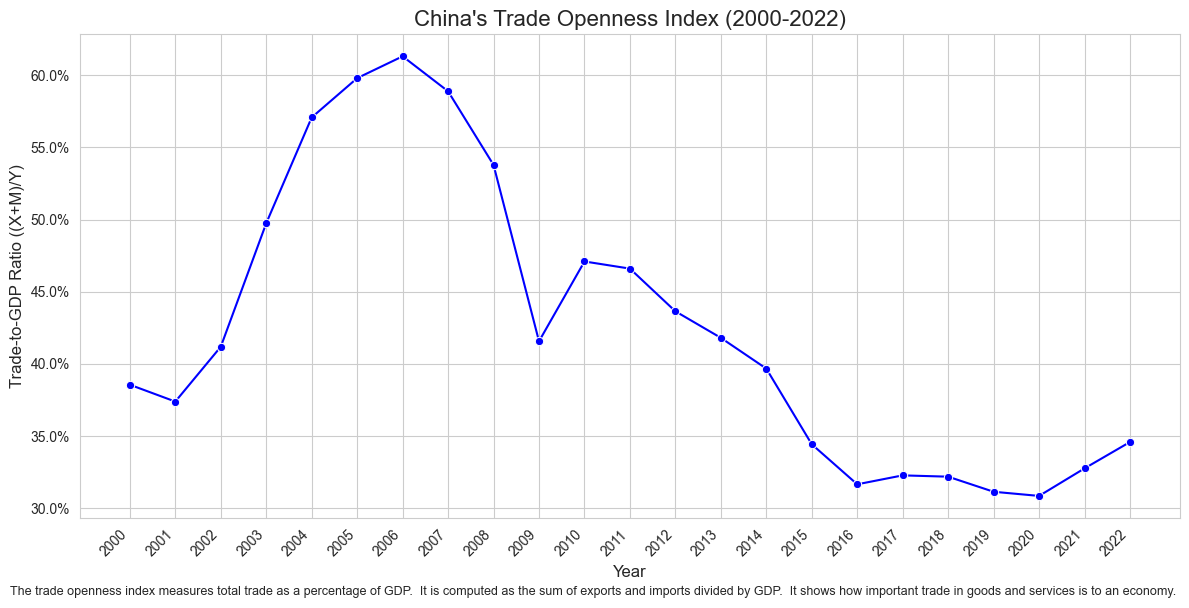

In [12]:
try:
    df_plot_data = pd.read_csv("china_trade_gdp_ratio_2000_2022.csv")
    print("Loaded data from CSV for plotting.")
except FileNotFoundError:
    print("Error: 'china_trade_gdp_ratio_2000_2022.csv' not found.")
    print("Please ensure the final calculation block was run successfully and created this CSV.")
    # If the df_combined DataFrame is already in memory, use it directly.
    # Otherwise, you would need to run the final calculation block first.
    if 'df_combined' in locals(): # Check if df_combined exists in local scope
        df_plot_data = df_combined
        print("Using df_combined from current session for plotting.")
    else:
        raise # Re-raise if neither CSV nor df_combined is available

# Ensure 'Year' is treated as an integer and sort for correct plotting order
df_plot_data['Year'] = df_plot_data['Year'].astype(int)
df_plot_data.sort_values(by='Year', inplace=True)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability

# Plot the (X+M)/Y_Ratio over time
# Make sure the column name for the ratio is correct based on your final output.
# It should be '(X+M)/Y_Ratio' as per our previous code.
sns.lineplot(x='Year', y='(X+M)/Y_Ratio', data=df_plot_data, marker='o', color='blue')

# Add titles and labels
plt.title('China\'s Trade Openness Index (2000-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trade-to-GDP Ratio ((X+M)/Y)', fontsize=12)

# Improve x-axis ticks to show all years clearly if possible, or a reasonable subset
plt.xticks(df_plot_data['Year'], rotation=45, ha='right')

# Format y-axis to show values as percentages (if the ratio is fractional, like 0.35)
# If your ratio is already scaled up (e.g., 35 for 35%), remove the '{:.1%}' part
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping


# Add caption
caption_text = "The trade openness index measures total trade as a percentage of GDP.  It is computed as the sum of exports and imports divided by GDP.  It shows how important trade in goods and services is to an economy. "
plt.figtext(0.5, 0.00, caption_text, ha="center", fontsize=9, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.show()

Here we do the following:
+ Use the UNComtrade API to fetch data on total Chinese imports from all trading partners
+ Use the UNComtrade API to fetch data on total Chinese exports from all trading partners
+ Compute the fraction of imports/exports each trading partner represents
+ Sort the data in descending order to find the top 5 trading partners with China
+ Export the data to a CSV file

In [ ]:
# --- Part 2: Analyzing Top Import and Export Partners for a Specific Year ---

# We will use the master DataFrame already fetched and cleaned in the first block:
# df_all_trade_detailed

# Configure the year for top partner analysis.
# Ensure this is an INTEGER to match the 'Year' column's data type.
selected_year_for_partners = 2022 # <<< CHANGED TO INTEGER!

# Ensure 'selected_reporter_code' is available (it should be from the first block)
try:
    print(f"\n--- Analyzing Top Partners for Reporter Code {selected_reporter_code} in {selected_year_for_partners} ---")
except NameError:
    print("\n--- ERROR: Please run the First Code Block entirely before running this one! ---")
    print("   Variables like 'selected_reporter_code' and 'selected_year_for_partners' are not defined.")
    # In a real notebook, you might stop execution here or load data from CSV if not run.
    # For a simple demo, we'll let it proceed but flag the error.

# --- Analyzing Top Import Partners for the Selected Year ---

print("\nTop Import Partners:")

# Filter the master DataFrame for the specific year (now an integer) and 'Imports'
df_imports_current_year = df_all_trade_detailed[
    (all_trade_partner['Year'] == selected_year_for_partners) &
    (all_trade_partner['Flow'] == 'Imports')
].copy() # .copy() prevents SettingWithCopyWarning

# --- DEBUGGING LINE: Check if filtered DF is empty ---
if df_imports_current_year.empty:
    print(f"Warning: df_imports_current_year is empty for Year={selected_year_for_partners}, Flow='Imports'.")
    print("Check 'Year' column data type and 'Flow' column values in df_all_trade_detailed.")
else:
    # Calculate the total import value for this specific year
    total_imports_for_partners_year = df_imports_current_year['primaryValue'].sum()

    # Compute the import fraction for each partner
    df_imports_current_year['importFraction'] = df_imports_current_year['primaryValue'] / total_imports_for_partners_year

    # Sort by importFraction in descending order to find the top partners
    df_top_imports_sorted = df_imports_current_year.sort_values(by='importFraction', ascending=False)

    # Display the top 5 import partners
    print("Top 5 Import Partners:")
    print(df_top_imports_sorted[['partnerDesc', 'primaryValue', 'importFraction']].head(5))

    # Optionally, save the sorted imports data to CSV
    output_path_imports_partners = rf"C:\Users\XPS\Dropbox\Website\International Trade\data\{selected_reporter_code}_imports_by_partner_{selected_year_for_partners}.csv"
    df_top_imports_sorted.to_csv(output_path_imports_partners, index=False)
    print(f"Top import partners data saved to: {output_path_imports_partners}")


# --- Analyzing Top Export Partners for the Selected Year ---

print(f"\n--- Top Export Partners for Reporter Code {selected_reporter_code} in {selected_year_for_partners} ---")

# Filter the master DataFrame for the specific year (now an integer) and 'Exports'
df_exports_current_year = df_all_trade_detailed[
    (all_trade_partner['Year'] == selected_year_for_partners) &
    (all_trade_partner['Flow'] == 'Exports')
].copy() # .copy() prevents SettingWithCopyWarning

# --- DEBUGGING LINE: Check if filtered DF is empty ---
if df_exports_current_year.empty:
    print(f"Warning: df_exports_current_year is empty for Year={selected_year_for_partners}, Flow='Exports'.")
    print("Check 'Year' column data type and 'Flow' column values in df_all_trade_detailed.")
else:
    # Calculate the total export value for this specific year
    total_exports_for_partners_year = df_exports_current_year['primaryValue'].sum()

    # Compute the export fraction for each partner
    df_exports_current_year['exportFraction'] = df_exports_current_year['primaryValue'] / total_exports_for_partners_year

    # Sort by exportFraction in descending order
    df_top_exports_sorted = df_exports_current_year.sort_values(by='exportFraction', ascending=False)

    # Display the top 5 export partners
    print("Top 5 Export Partners:")
    print(df_top_exports_sorted[['partnerDesc', 'primaryValue', 'exportFraction']].head(5))

    # Optionally, save the sorted exports data to CSV
    output_path_exports_partners = rf"C:\Users\XPS\Dropbox\Website\International Trade\data\{selected_reporter_code}_exports_by_partner_{selected_year_for_partners}.csv"
    df_top_exports_sorted.to_csv(output_path_exports_partners, index=False)
    print(f"Top export partners data saved to: {output_path_exports_partners}")


--- Analyzing Top Partners for Reporter Code 156 in 2022 ---

Top Import Partners:
Top 5 Import Partners:
          partnerDesc  primaryValue  importFraction
9405  Other Asia, nes  2.380918e+11        0.091817
9383    Rep. of Korea  1.996671e+11        0.076999
9378            Japan  1.844970e+11        0.071149
9493              USA  1.789568e+11        0.069012
9293        Australia  1.420915e+11        0.054796
Top import partners data saved to: C:\Users\XPS\Dropbox\International Trade\Module 4 2025\data\156_imports_by_partner_2022.csv

--- Top Export Partners for Reporter Code 156 in 2022 ---
Top 5 Export Partners:
               partnerDesc  primaryValue  exportFraction
9711                   USA  5.827561e+11        0.162165
9585  China, Hong Kong SAR  2.975384e+11        0.082797
9596                 Japan  1.729274e+11        0.048121
9601         Rep. of Korea  1.626214e+11        0.045253
9680              Viet Nam  1.469599e+11        0.040895
Top export partners data saved

Here we do the following:
+ Use the UNComtrade API to fetch China imports and exports at the HS 2-digit level
+ Aggregate the HS 2-digit level data into broader sectoral categories for easier interpretation
+ Compute the Lloyd-Grubel index for each sectoral category

Of course, the value of the Lloyd-Grubel index is sensitive the level of aggregation you choose to use.  The more disaggregated data is almost surely going to generate lower values of the index, and the more aggregated data higher values.  Which level of aggregation you choose to use depends on the research question at hand.  Besides categorizing goods by HS x-digit, it would also be useful to categorize goods into raw, intermediate, and final goods.  We don't do that in this homework however.  You would likely find that the degree of intra-industry trade (high values of Lloyd-Grubel index) is highest for intermediate goods. 



(Note: I collected the product level data using a loop because, without a subscription, the UNComtrade API limits the amount of data you can fetch.  The loop circumvents this constraint.)

In [ ]:
# List of data you want to retrieve
# Add vectors of components to fetch the desired data

# List of HS 2-digit codes you want to retrieve (e.g., '01' to '05')
# I'm writing a loop to get around the UN Comtrade subscription
hs_codes = [f"{i:02d}" for i in range(1, 99)]

# List of flow codes you want to retrieve (e.g. 'X','M')
flow_codes = ['X', 'M']  # Exports and Imports

# Initialize an empty list to store dataframes
all_data = []

# Fetch the data
for hs_code in hs_codes:
    for flow in flow_codes:
        print(f"Fetching data for HS code {hs_code} and flow {flow}")
        
        raw_data = comtradeapicall.previewFinalData(
            typeCode='C',
            freqCode='A',
            clCode='HS',
            period='2022',
            reporterCode='156',  # China
            cmdCode=hs_code,     # 2-digit HS code
            flowCode=flow,       # Single flow code as string
            partnerCode=None,
            partner2Code=None,
            customsCode=None,
            motCode=None,
            maxRecords=50000,
            format_output='JSON',
            aggregateBy=None,
            breakdownMode='classic',
            countOnly=None,
            includeDesc=True
        )
        
        df = pd.DataFrame(raw_data)
        # Add a column to indicate flow type (Export or Import)
        df['flowCode'] = flow  
        all_data.append(df)

# Concatenate all dataframes into one
df_all = pd.concat(all_data, ignore_index=True)

# Preview and export the data to a CSV file
print(df_all.head())
df_all.to_csv('china_exports_imports_01_to_98.csv', index=False)

In [ ]:
# If you already have the CSV file with import and export data, but don't have the data loaded into your current workspace, you can just import the data into your workspace from the CSV file

import pandas as pd

# Adjust the path to where your CSV file is saved
df_all = pd.read_csv(r'C:\Users\PHBS\china_exports_imports_01_to_98.csv')

# Optional: preview the data
df_all

In [ ]:
# Aggregate 2-digit HS codes into broader categories as defined by https://www.censtatd.gov.hk/en/index_hs_code.html
hs_category_map = {}

# Define the new categories
def assign_range(start, end, category):
    for i in range(start, end+1):
        hs_category_map[str(i).zfill(2)] = category

assign_range(1, 5, "Animal Products")
assign_range(6, 14, "Vegetable Products")
hs_category_map['15'] = "Animal, Vegetable or Microbial Fats & Oils"
assign_range(16, 24, "Prepared Foodstuffs; Beverages, Spirits & Vinegar; Tobacco; Products Intended for Inhalation Without Combustion; Other Nicotine Containing Products Intended for Intake of Nicotine into Human Body")
assign_range(25, 27, "Mineral Products")
assign_range(28, 38, "Chemical Products")
assign_range(39, 40, "Plastics & Articles thereof; Rubber & Articles thereof")
assign_range(41, 43, "Hides, Skins, Leather & Furskins; Travel Goods & Handbags")
assign_range(44, 46, "Wood & Articles of Wood; Manufactures of Plaiting Materials")
assign_range(47, 49, "Wood Pulp; Paper & Articles of Paper")
assign_range(50, 63, "Textiles & Textile Articles")
assign_range(64, 67, "Footwear & Headgear; Articles of Feather; Artificial Flowers; Articles of Human Hair")
assign_range(68, 70, "Articles of Stone, Plaster, Cement, Asbestos or Mica; Ceramic Products & Glassware")
hs_category_map['71'] = "Pearls, Precious or Semi-Precious Stones, Precious Metals, Metals Clad with Precious Metal, & Articles thereof; Imitation Jewellery"
assign_range(72, 83, "Base Metals & Articles of Base Metal")
assign_range(84, 85, "Machinery & Mechanical Appliances; Electrical Equipment")
assign_range(86, 89, "Transport Equipment")
assign_range(90, 92, "Precision or Medical Instruments & Apparatus; Clocks & Watches; Musical Instruments")
hs_category_map['93'] = "Arms & Ammunition"
assign_range(94, 96, "Furniture; Toys & Games/Sports Requisites; Miscellaneous Manufactured Articles")
hs_category_map['97'] = "Works of Art, Collectors' Pieces & Antiques"
hs_category_map['98'] = "Commodities Not Classified According to Kind"

df_all['cmdCode'] = df_all['cmdCode'].astype(str).str.zfill(2)
df_all['broad_category'] = df_all['cmdCode'].map(hs_category_map)
df_exports = df_all[df_all['flowCode'] == 'X'].reset_index(drop=True)
df_imports = df_all[df_all['flowCode'] == 'M'].reset_index(drop=True)

# Aggregate over the new categories
df_aggregate_exports = df_exports.groupby('broad_category')['primaryValue'].sum().reset_index()
df_aggregate_imports = df_imports.groupby('broad_category')['primaryValue'].sum().reset_index()

In [ ]:
# Create easy to read table of export and import values

# Rename values for the final table
df_aggregate_exports.rename(columns={'primaryValue': 'Volume of Exports'}, inplace=True)
df_aggregate_imports.rename(columns={'primaryValue': 'Volume of Imports'}, inplace=True)

# Merge the two on the category name
trade_summary = pd.merge(df_aggregate_imports, df_aggregate_exports, on='broad_category', how='outer')

# Adjust units to billions USD
trade_summary['Volume of Imports'] = (trade_summary['Volume of Imports'] / 1e9).round(2)
trade_summary['Volume of Exports'] = (trade_summary['Volume of Exports'] / 1e9).round(2)

# Sort and rename the first column
trade_summary.rename(columns={'broad_category': 'China Trade in Goods 2022','primaryValue':''}, inplace=True)
trade_summary = trade_summary[['China Trade in Goods 2022', 'Volume of Imports', 'Volume of Exports']]
trade_summary = trade_summary.sort_values('China Trade in Goods 2022').reset_index(drop=True)

# View the easy to read table
trade_summary

In [ ]:
# Compute the Grubel-Lloyd index for each category
trade_summary['Grubel-Lloyd Index'] = 1 - (
    abs(trade_summary['Volume of Exports'] - trade_summary['Volume of Imports']) /
    (trade_summary['Volume of Exports'] + trade_summary['Volume of Imports'])
)

# Optional: Round for readability
trade_summary['Grubel-Lloyd Index'] = trade_summary['Grubel-Lloyd Index'].round(3)

# Display the result
trade_summary[['China Trade in Goods 2022', 'Volume of Imports', 'Volume of Exports', 'Grubel-Lloyd Index']]

Now we want to measure trade statistics for primary, intermediate, and final goods.  We'll make use of the Broad Economic Categories (BEC) classification within the UN Comtrade data rather than the HS classification system.  We implement this by modifying our `fetch_trade_data` function to fetch data based on the BEC classification system by changing the specification `clCode` to `BEC`. 